In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv('data.csv', parse_dates=['date','datetime'])
print(df.shape)
df.head()



Saving data.csv to data (2).csv
(1133, 6)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
missing_card = df['card'].isna().sum()
total_rows = len(df)
print(f"Missing 'card': {missing_card} of {total_rows} rows")

payment_counts = df['cash_type'].value_counts()
print(payment_counts)

Missing 'card': 89 of 1133 rows
cash_type
card    1044
cash      89
Name: count, dtype: int64


In [ ]:
df['month'] = df['date'].dt.to_period('M').astype(str)
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour


In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 30))

<Figure size 1600x3000 with 0 Axes>

<Figure size 1600x3000 with 0 Axes>

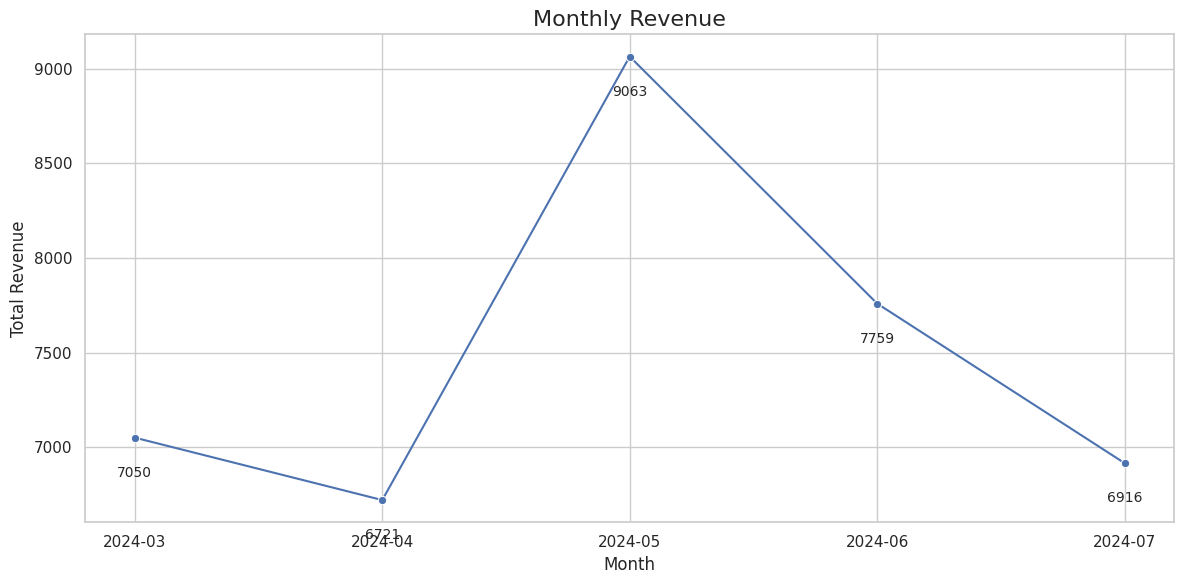

In [ ]:
# Monthly Revenue Chart
monthly_revenue = df.groupby('month')['money'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")


sns.lineplot(data=monthly_revenue, x='month', y='money', marker='o')

for i, row in monthly_revenue.iterrows():
    plt.text(row['month'], row['money'] - 150, f"{row['money']:.0f}",
             ha='center', va='top', fontsize=10)

plt.title('Monthly Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipython-input-64-1768463937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coffee_counts, y='coffee_name', x='count', palette='muted')


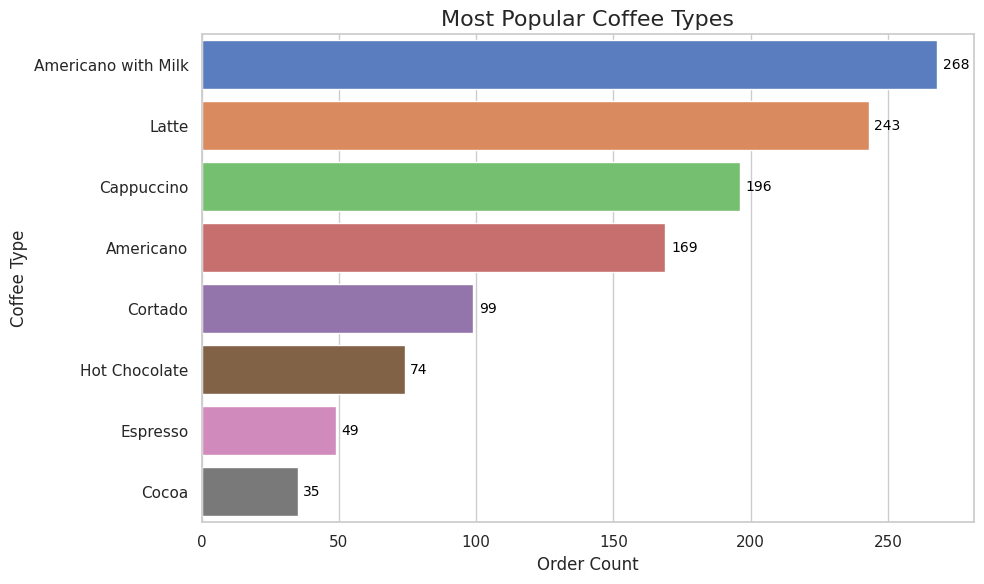

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coffee_counts = df['coffee_name'].value_counts().reset_index()
coffee_counts.columns = ['coffee_name', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=coffee_counts, y='coffee_name', x='count', palette='muted')


for index, row in coffee_counts.iterrows():
    plt.text(row['count'] + 2, index, row['count'], color='black', va='center', fontsize=10)

plt.title('Most Popular Coffee Types', fontsize=16)
plt.xlabel('Order Count')
plt.ylabel('Coffee Type')

plt.tight_layout()
plt.show()


/tmp/ipython-input-70-719823862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_sales, x='money', y='coffee_name', palette='viridis')


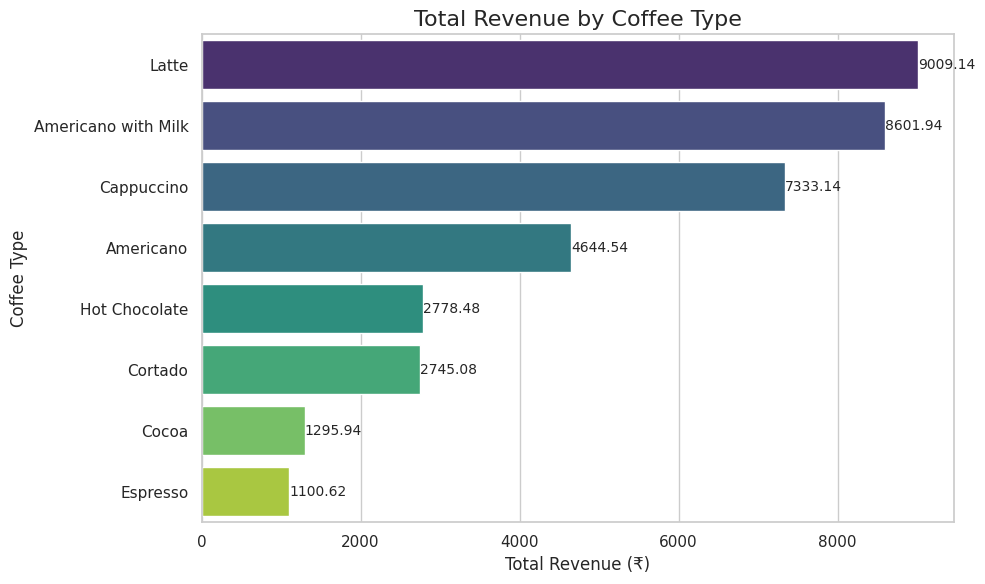

In [ ]:
# Total revenue generated per coffee type
total_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.barplot(data=total_sales, x='money', y='coffee_name', palette='viridis')


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)


plt.title('Total Revenue by Coffee Type', fontsize=16)
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.tight_layout()
plt.show()


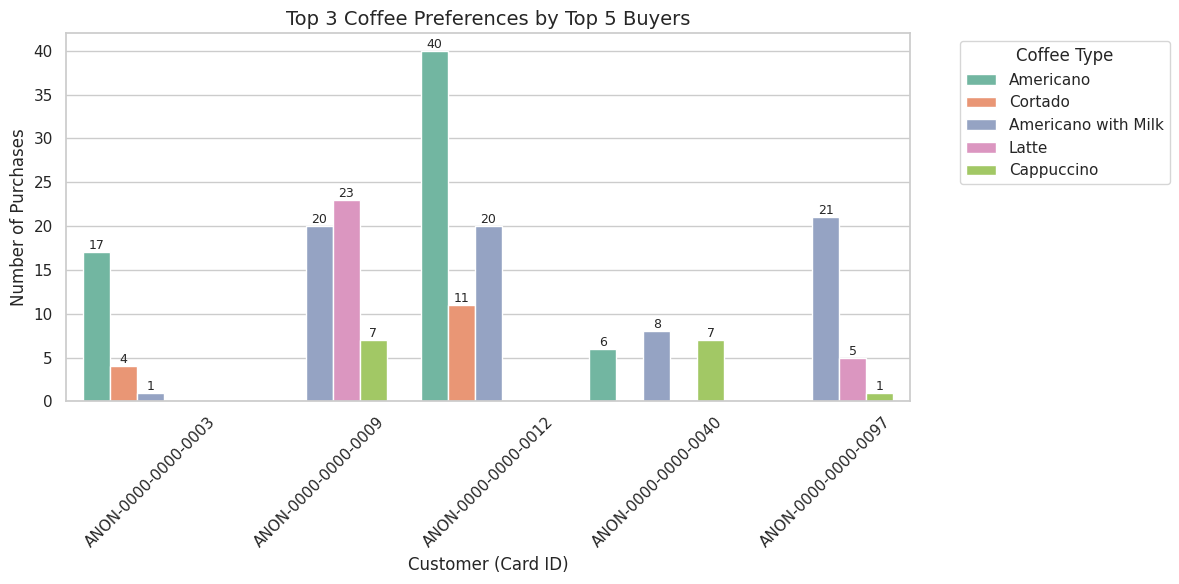

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 5 buyers by frequency
top_5_cards = df['card'].value_counts().nlargest(5).index

# Step 2: Filter only top 5 buyer data
top_buyers_df = df[df['card'].isin(top_5_cards)]

# Step 3: Count how many times each coffee was bought by each buyer
coffee_pref = (
    top_buyers_df.groupby(['card', 'coffee_name'])
    .size()
    .reset_index(name='purchase_count')
)

# Step 4: Select top 3 coffee types per card
top_3_coffee_pref = (
    coffee_pref.sort_values(['card', 'purchase_count'], ascending=[True, False])
    .groupby('card')
    .head(3)
)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=top_3_coffee_pref,
    x='card',
    y='purchase_count',
    hue='coffee_name',
    palette='Set2'
)

# Add labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', fontsize=9)

# Titles and labels
plt.title('Top 3 Coffee Preferences by Top 5 Buyers', fontsize=14)
plt.xlabel('Customer (Card ID)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-65-4061776319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=df, x='weekday', order=weekday_order, palette='pastel')


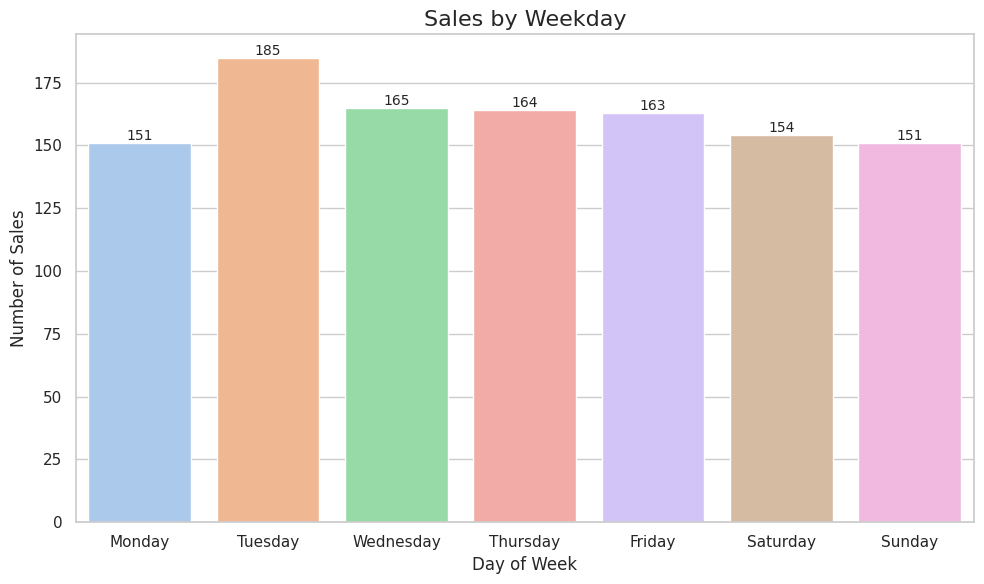

In [ ]:

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=df, x='weekday', order=weekday_order, palette='pastel')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.title("Sales by Weekday", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()


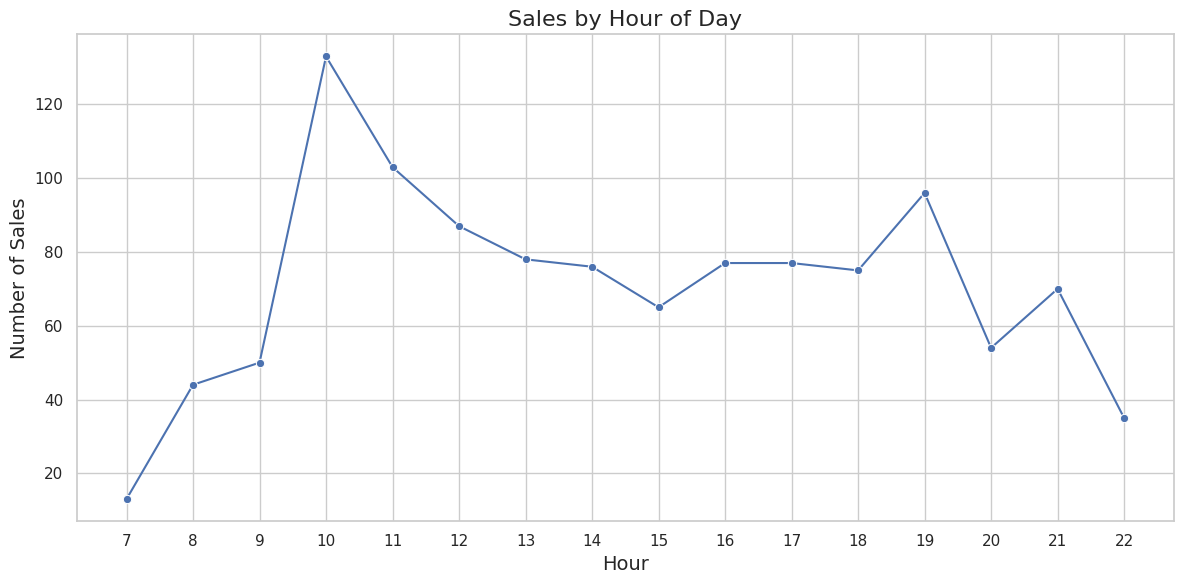

In [ ]:
hourly_sales = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Sales by Hour of Day', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)
plt.xticks(hourly_sales.index)
plt.tight_layout()
plt.show()


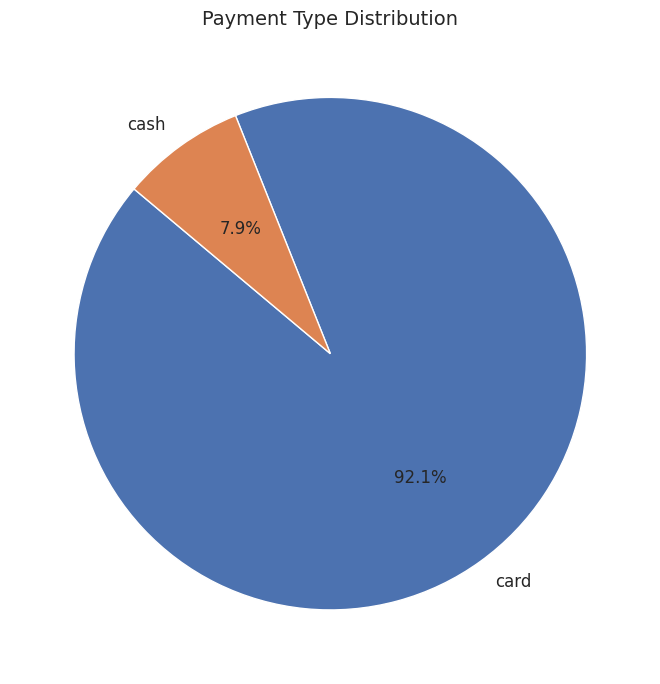

In [ ]:
import matplotlib.pyplot as plt

payment_counts = df['cash_type'].value_counts().reset_index()
payment_counts.columns = ['Payment Type', 'Count']

plt.figure(figsize=(7, 7))
plt.pie(
    payment_counts['Count'],
    labels=payment_counts['Payment Type'],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)

plt.title('Payment Type Distribution', fontsize=14)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

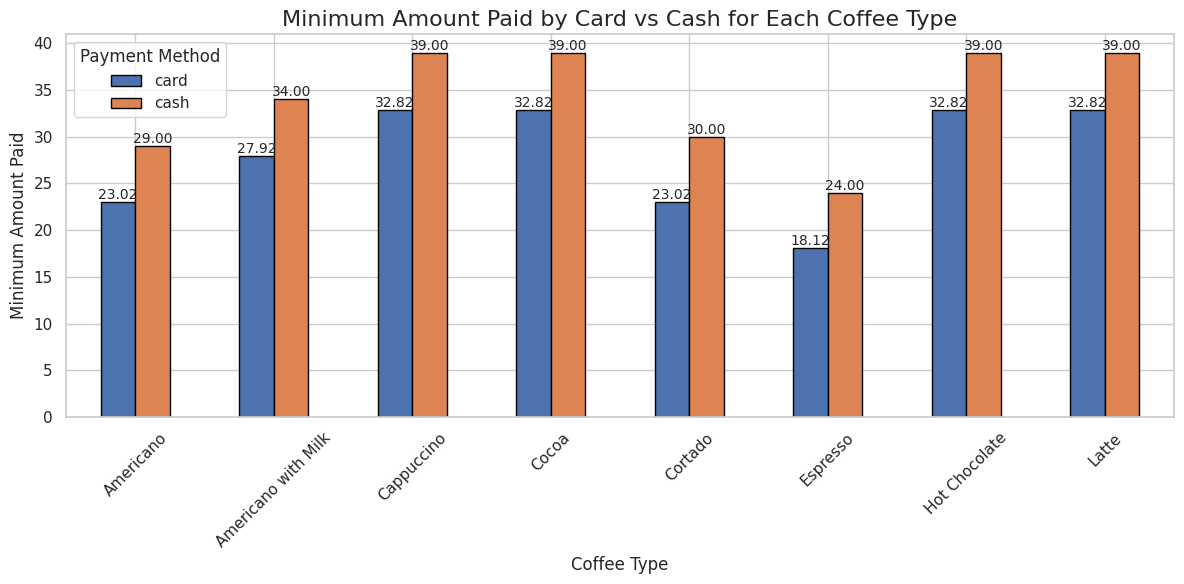

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['cash_type'].isin(['card', 'cash'])]

min_price = (
    filtered_df.groupby(['coffee_name', 'cash_type'])['money']
    .min()
    .reset_index()
)

pivot_min = min_price.pivot(index='coffee_name', columns='cash_type', values='money').reset_index()

plt.figure(figsize=(12, 6))
bar_plot = pivot_min.plot(
    kind='bar',
    x='coffee_name',
    figsize=(12, 6),
    rot=45,
    edgecolor='black'
)

plt.title('Minimum Amount Paid by Card vs Cash for Each Coffee Type', fontsize=16)
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Minimum Amount Paid', fontsize=12)
plt.legend(title='Payment Method', fontsize=11, title_fontsize=12)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
stats = df.groupby(['coffee_name', 'cash_type'])['money'].agg(['min', 'mean']).unstack()

stats


min             mean           
cash_type             card  cash       card       cash
coffee_name                                           
Americano            23.02  29.0  27.306710  29.428571
Americano with Milk  27.92  34.0  31.952332  34.533333
Cappuccino           32.82  39.0  37.227293  39.666667
Cocoa                32.82  39.0  36.740000  39.250000
Cortado              23.02  30.0  27.607234  30.000000
Espresso             18.12  24.0  22.195909  24.800000
Hot Chocolate        32.82  39.0  37.345294  39.833333
Latte                32.82  39.0  36.780459  39.640000

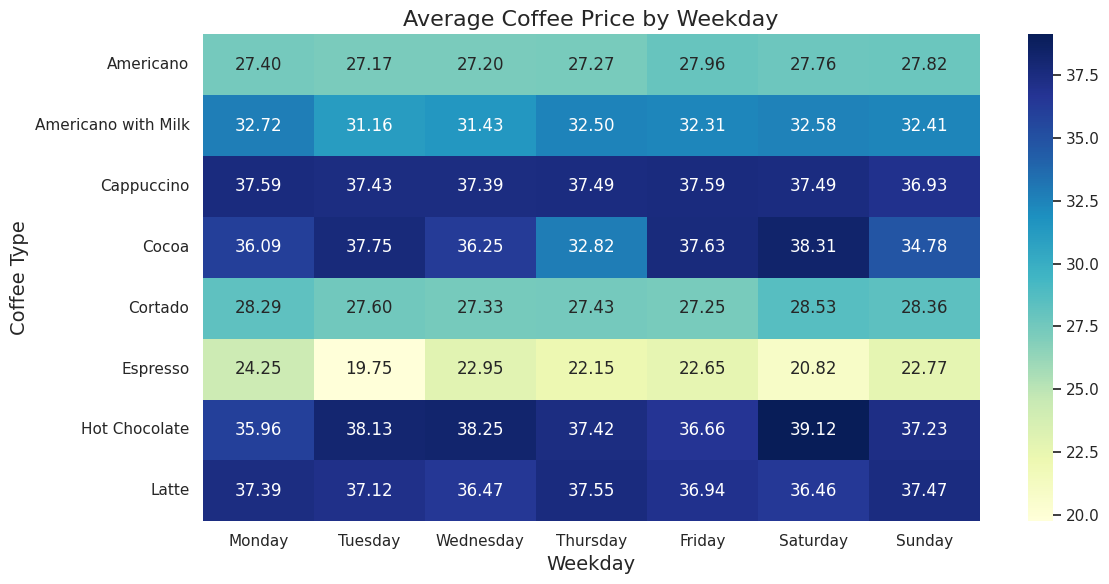

In [ ]:
weekday_price = df.groupby(['coffee_name', 'weekday'])['money'].mean().unstack()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_price = weekday_price[weekday_order]

plt.figure(figsize=(12, 6))
sns.heatmap(weekday_price, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Coffee Price by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Coffee Type', fontsize=14)
plt.tight_layout()
plt.show()
